In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import ensemble

## 1) Exploratory Data Analysis

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip() if x != 'url' else x, inplace=True)
df.rename(columns={' is_weekend': 'is_weekend'}, inplace=True)
df['is_weekend'] = df['is_weekend'].astype('bool')



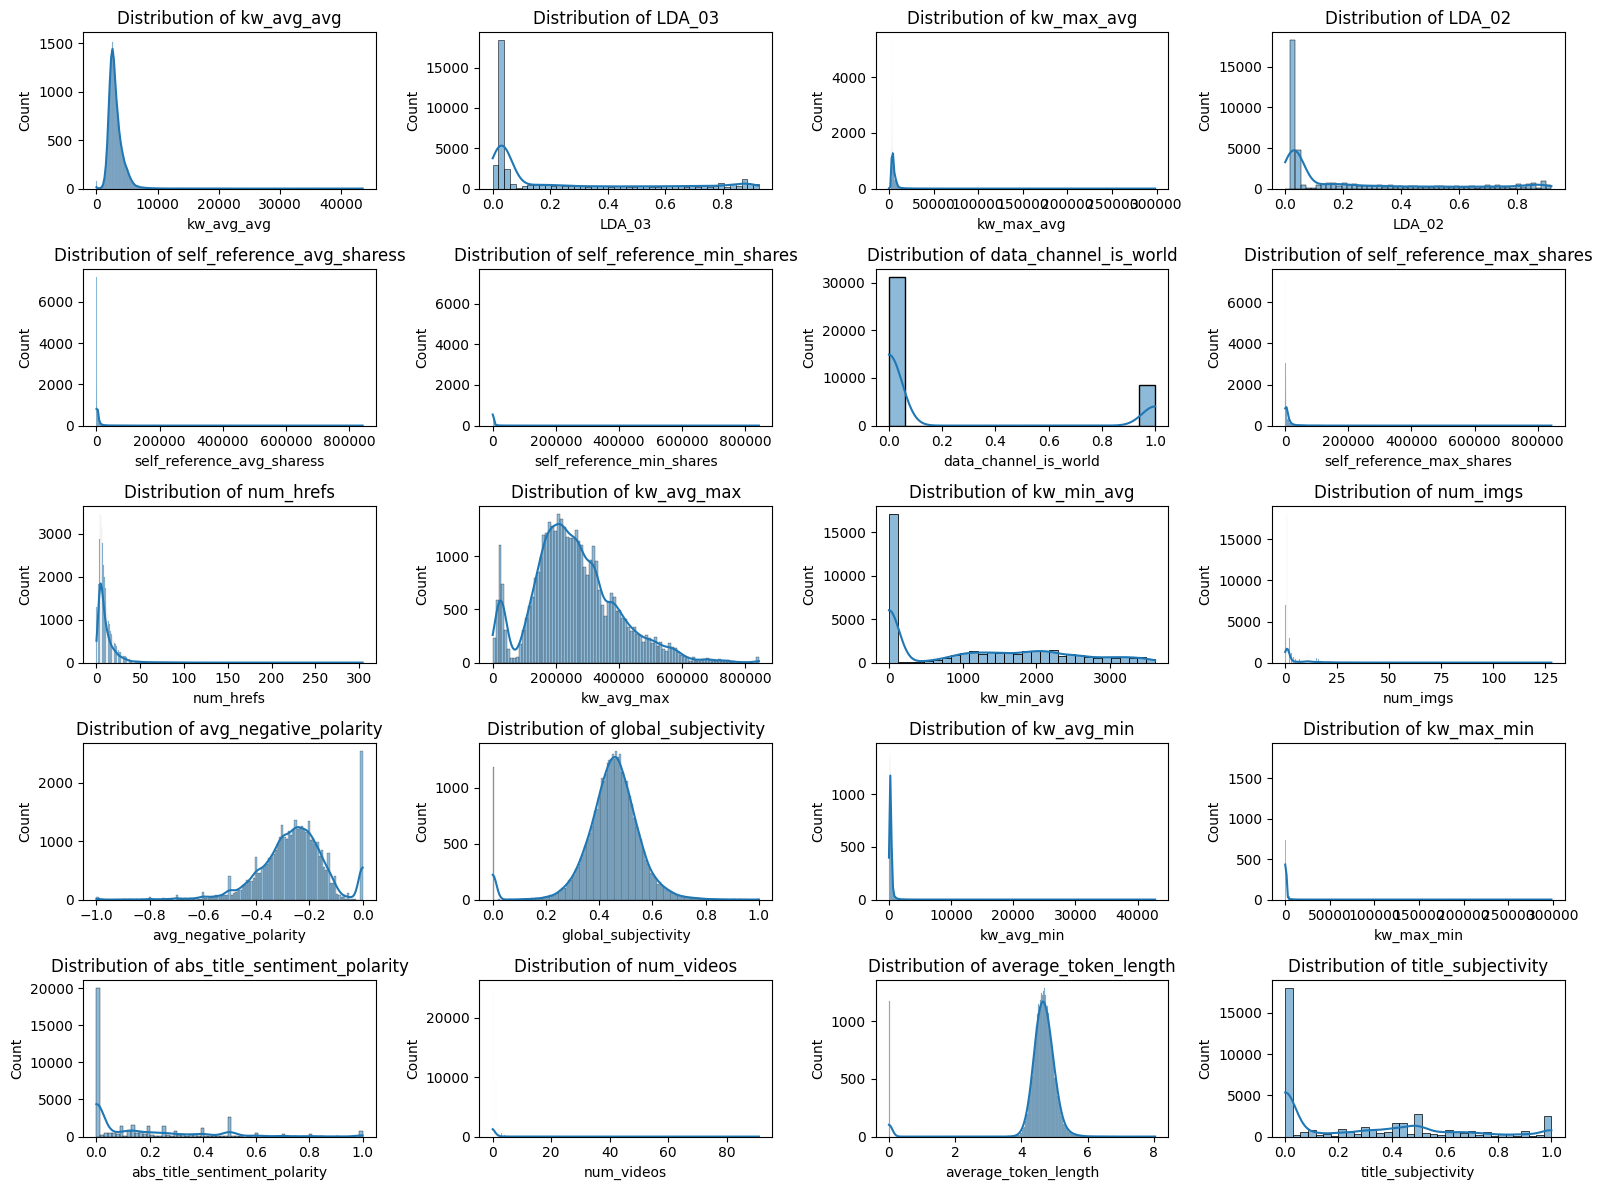

In [39]:
# Drop the 'url' column before computing the correlation
df_numeric = df.drop(columns=['url'])

# Compute correlation with the target variable
correlation_with_target = df_numeric.corr()['shares'].abs().sort_values(ascending=False)

# Select top 20 features with the highest correlation with the target variable
top_20_features = correlation_with_target.index[1:21]  # Exclude the target variable itself

# Distribution Plots of Top 20 Features
plt.figure(figsize=(16, 12))
for i, column in enumerate(top_20_features, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

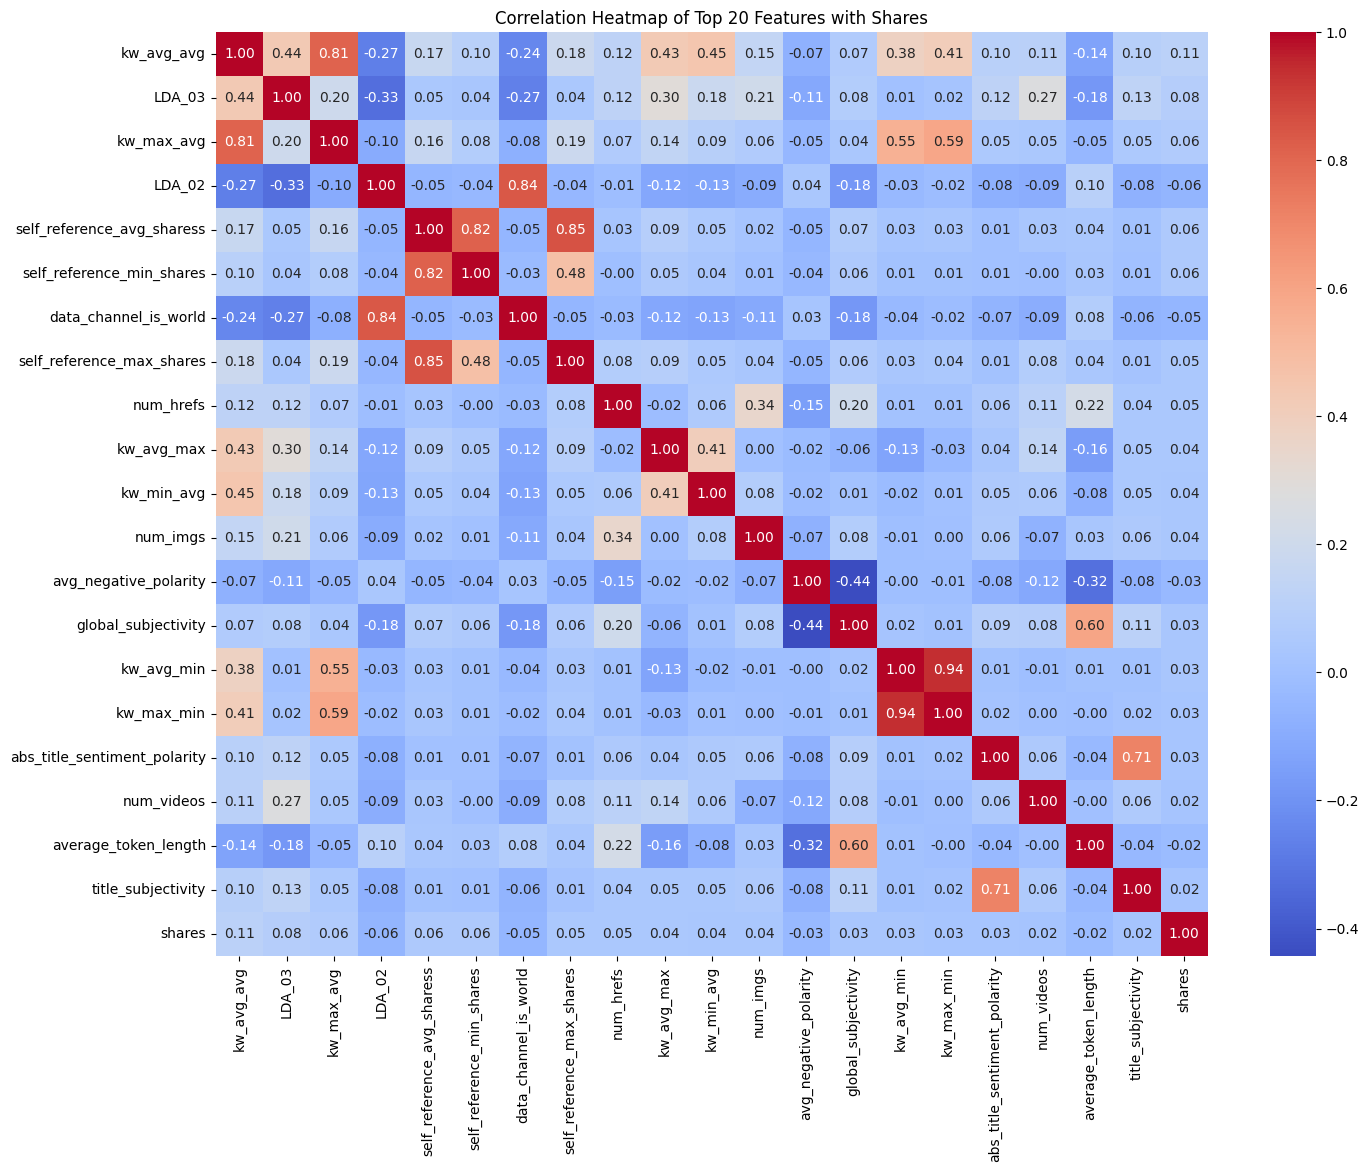

In [40]:
# Correlation Heatmap of Top 20 Features with Shares
plt.figure(figsize=(16, 12))
top_20_corr_matrix_with_shares = df[top_20_features.tolist() + ['shares']].corr()
sns.heatmap(top_20_corr_matrix_with_shares, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 20 Features with Shares')
plt.show()


C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float

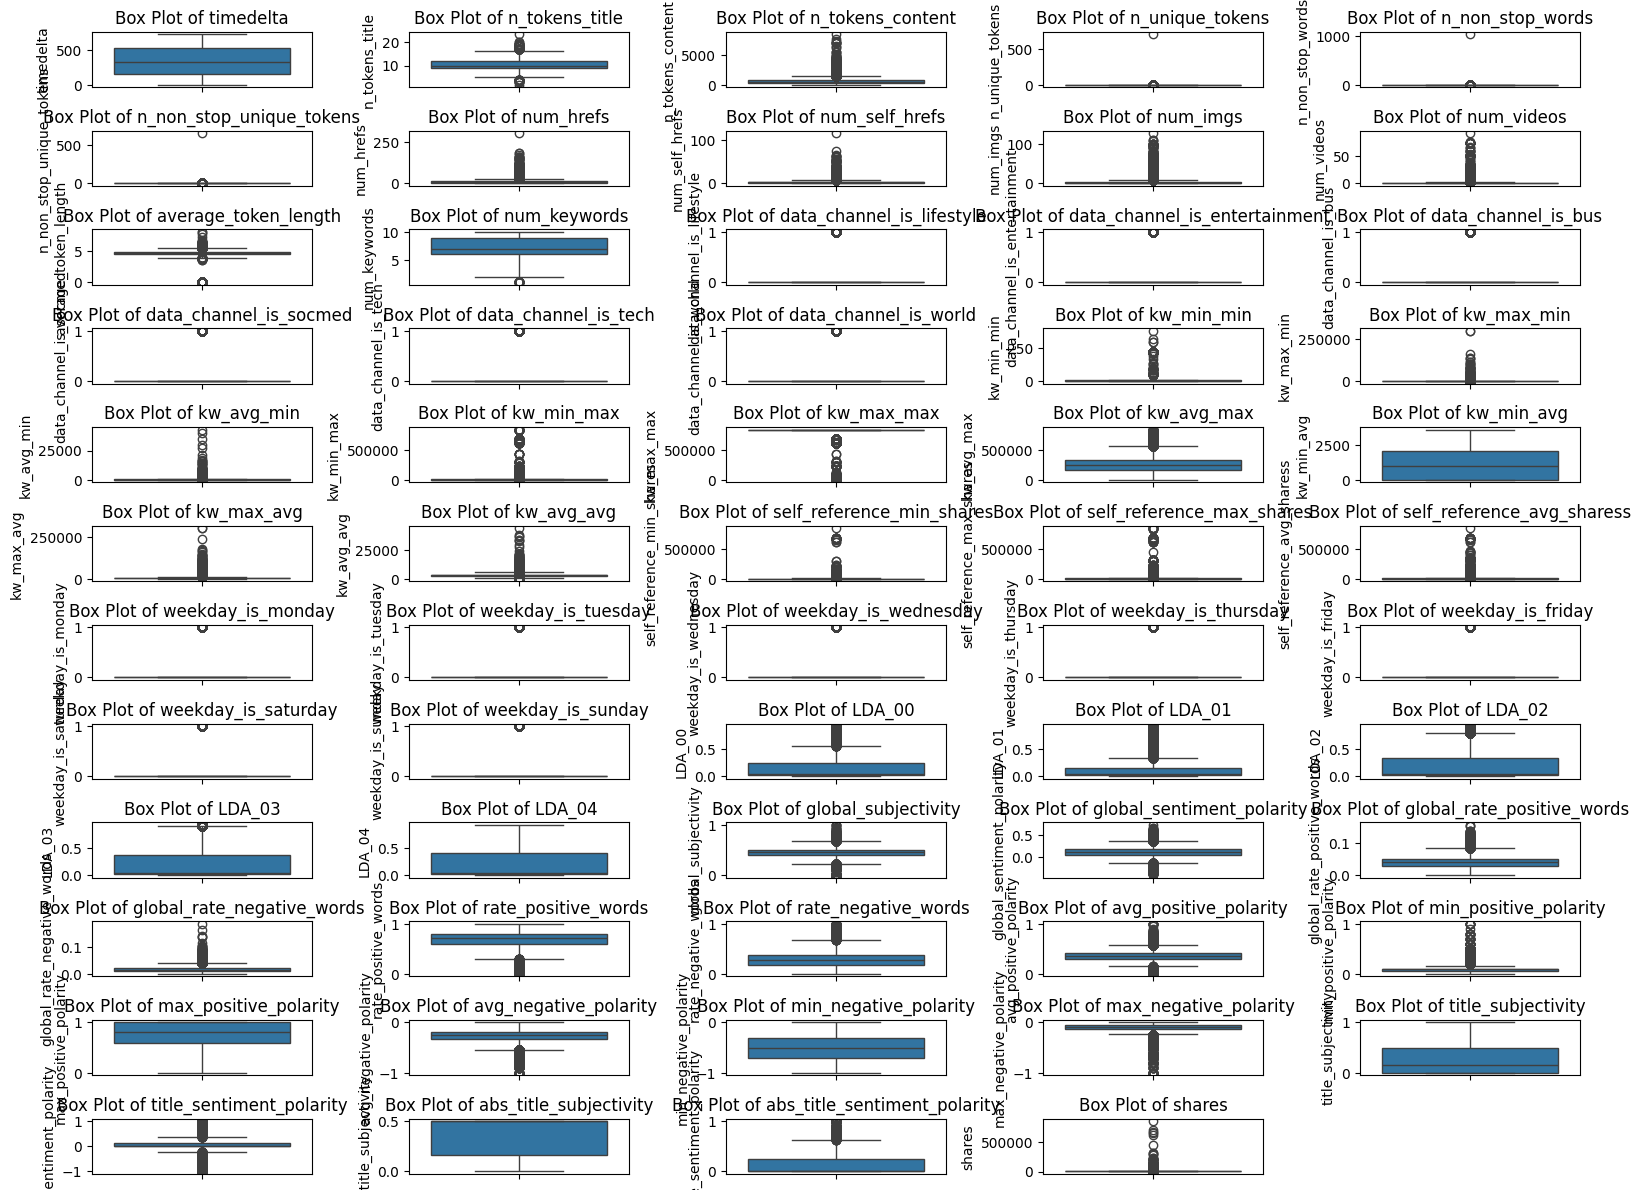

In [41]:
# Box Plots
plt.figure(figsize=(16, 12))
num_columns = len(df.select_dtypes(include=[np.number]).columns)
num_rows = (num_columns // 5) + 1

for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(num_rows, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


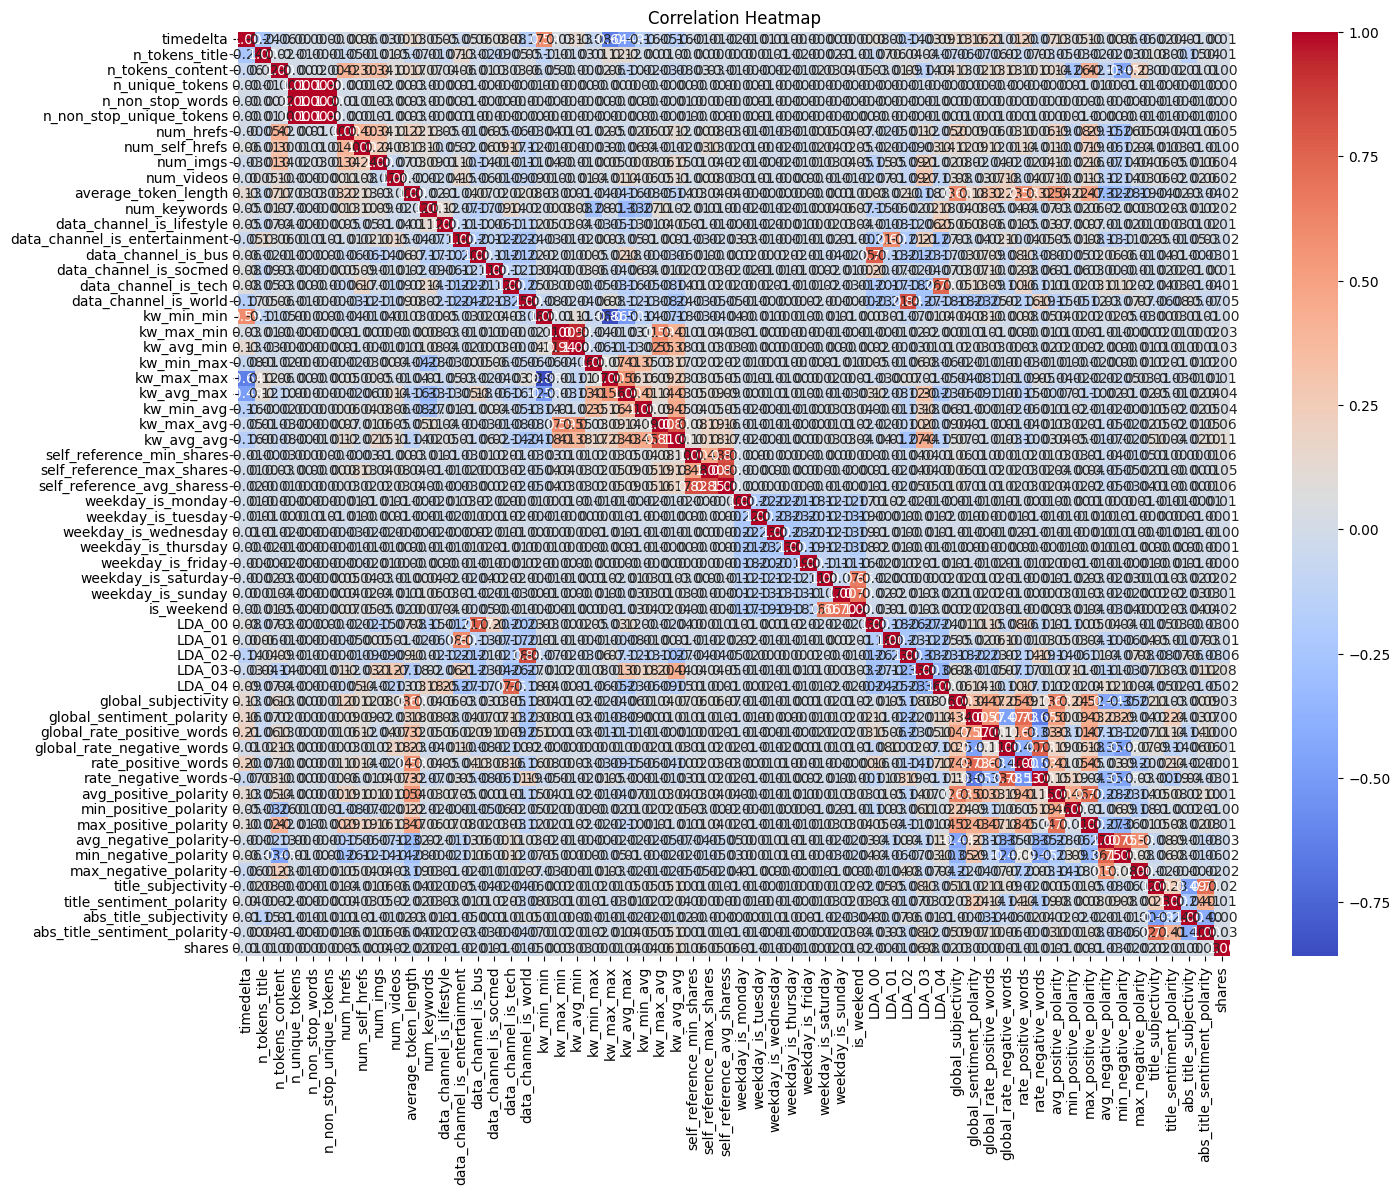

In [42]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
# Drop the 'url' column before calculating the correlation matrix
corr_matrix = df.drop(columns=['url']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Separate features and target
X = df.drop(['shares', 'url'], axis=1)
y = df['shares']

# Convert target variable to binary classification
threshold = 1400
y_binary = (y >= threshold).astype(int)

# Outlier Detection and Elimination
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1
X, y_binary = X[mask], y_binary[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Supervised Learning

### Classification with Kbest

Selected features based on SelectKBest: ['num_hrefs', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_01', 'LDA_02', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'rate_positive_words', 'rate_negative_words']
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      3604
           1       0.66      0.69      0.67      3929

    accuracy                           0.65      7533
   macro avg       0.65      0.65      0.65      7533
weighted avg       0.65      0.65      0.65      7533

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      3604
           1       0.66      0.71      0.68      3929

    accuracy       

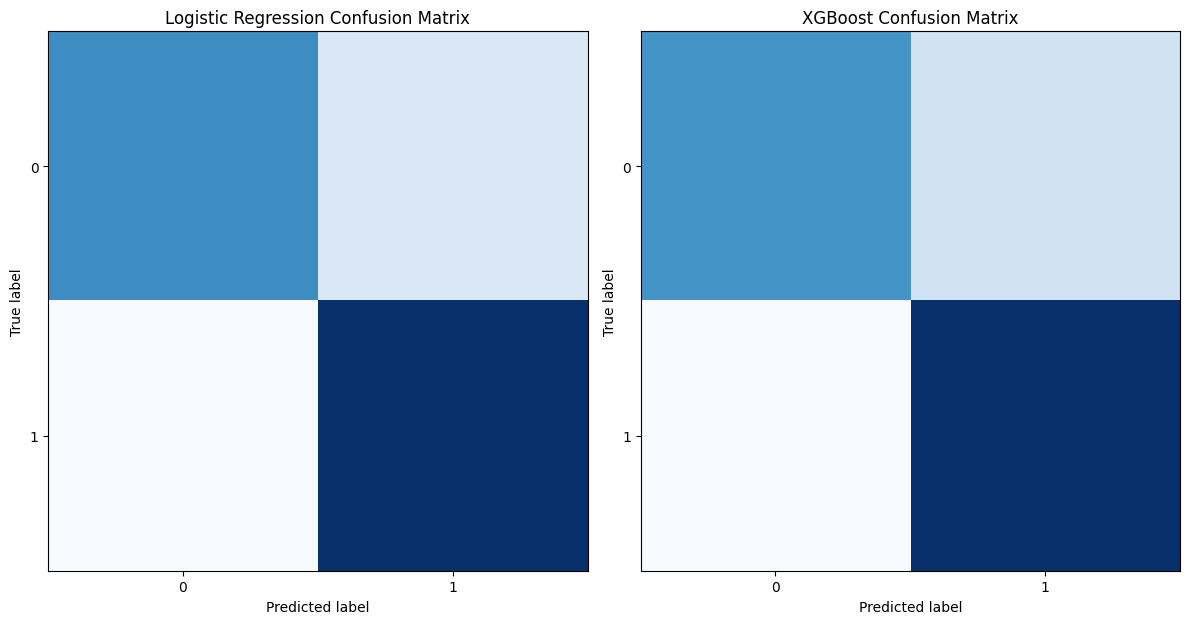

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip() if x != 'url' else x, inplace=True)
df.rename(columns={' is_weekend': 'is_weekend'}, inplace=True)
df['is_weekend'] = df['is_weekend'].astype('bool')

# Separate features and target
X = df.drop(['shares', 'url'], axis=1)
y = df['shares']

# Convert target variable to binary classification
threshold = 1400
y_binary = (y >= threshold).astype(int)

# Outlier Detection and Elimination
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1
X, y_binary = X[mask], y_binary[mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Subset Selection using SelectKBest with f_classif
k = 20  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]
print(f"Selected features based on SelectKBest: {list(selected_features)}")

# Model Training and Evaluation

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# XGBoost Classifier with Hyperparameter Tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_selected, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_selected)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
axes[0].imshow(cm_lr, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
axes[1].imshow(cm_xgb, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()

### Classification without Feature Selection

### Logistic Regression

In [45]:
# Model Training and Evaluation

# Logistic Regression
lr = LogisticRegression(max_iter=1000)

# Logistic Regression with Grid Search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_
y_pred_lr_grid = best_lr.predict(X_test_scaled)
print("Logistic Regression with Grid Search Performance:")
print(classification_report(y_test, y_pred_lr_grid))

Logistic Regression with Grid Search Performance:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3604
           1       0.67      0.70      0.68      3929

    accuracy                           0.66      7533
   macro avg       0.66      0.66      0.66      7533
weighted avg       0.66      0.66      0.66      7533



### XGBoost

In [46]:
# XGBoost Classifier with Hyperparameter Tuning
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      3604
           1       0.69      0.73      0.71      3929

    accuracy                           0.69      7533
   macro avg       0.69      0.68      0.68      7533
weighted avg       0.69      0.69      0.69      7533



### Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Naive Bayes Classifier with Grid Search
nb = GaussianNB()
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train_scaled, y_train)
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_scaled)
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.57      0.78      0.66      3604
           1       0.69      0.47      0.56      3929

    accuracy                           0.61      7533
   macro avg       0.63      0.62      0.61      7533
weighted avg       0.64      0.61      0.61      7533



### Support Vector Machines (SVM)

In [48]:
from sklearn.svm import SVC

# Support Vector Machines (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machines (SVM) Performance:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machines (SVM) Performance:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63      3604
           1       0.66      0.69      0.68      3929

    accuracy                           0.66      7533
   macro avg       0.65      0.65      0.65      7533
weighted avg       0.66      0.66      0.66      7533



## Unsupervised Learning 

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



### Split Data Based on Aspects

In [50]:
# Combine X_train_scaled and X_test_scaled
X_scaled = np.vstack((X_train_scaled, X_test_scaled))

# Combine y_train and y_test
y_scaled = np.concatenate((y_train, y_test))

# Convert to DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

# Split the combined data into subsets
X_words = X_scaled_df.iloc[:, 1:6]
X_links = X_scaled_df.iloc[:, 6:8]
X_digital = X_scaled_df.iloc[:, 8:11]
X_kw = X_scaled_df.iloc[:, 11:27]
X_time = X_scaled_df.iloc[:, 30:37]
X_nlp = X_scaled_df.iloc[:, 38:59]

In [51]:
X_words

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0           -1.134887          0.532290        -0.651966          0.795484   
1            0.287148         -0.057844        -0.556016          0.489046   
2            0.761159         -0.687615         0.944367         -0.572559   
3            0.287148          0.133729        -0.229124          0.664915   
4            0.761159         -0.407961         0.124598          0.114393   
...               ...               ...              ...               ...   
37656       -1.134887          1.089395        -0.832270          0.855172   
37657        0.761159         -0.669999         0.472006         -0.508873   
37658        0.287148         -0.775695         1.583773         -0.845155   
37659       -0.660875         -0.758079         1.231237         -0.655430   
37660       -0.660875          0.098497        -0.412982          0.620681   

       n_non_stop_unique_tokens  
0                     -0.747227  
1                     -0.430782  
2                      1.537090  
3                     -0.177980  
4                      0.344426  
...                         ...  
37656                 -0.035981  
37657                  0.761267  
37658                  1.390534  
37659                  0.870019  
37660                 -0.640141  

[37661 rows x 5 columns]

In [52]:
# Function to apply PCA and K-Means clustering
def apply_pca_kmeans(X, n_components=2, n_clusters=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    return X_pca, kmeans_labels

# Apply PCA and K-Means clustering for each subset
X_words_pca, X_words_kmeans_labels = apply_pca_kmeans(X_words)
X_links_pca, X_links_kmeans_labels = apply_pca_kmeans(X_links)
X_digital_pca, X_digital_kmeans_labels = apply_pca_kmeans(X_digital)
X_kw_pca, X_kw_kmeans_labels = apply_pca_kmeans(X_kw)
X_time_pca, X_time_kmeans_labels = apply_pca_kmeans(X_time)
X_nlp_pca, X_nlp_kmeans_labels = apply_pca_kmeans(X_nlp)

# Calculate and print silhouette scores
silhouette_scores = {
    'X_words': silhouette_score(X_words, X_words_kmeans_labels),
    'X_links': silhouette_score(X_links, X_links_kmeans_labels),
    'X_digital': silhouette_score(X_digital, X_digital_kmeans_labels),
    'X_kw': silhouette_score(X_kw, X_kw_kmeans_labels),
    'X_time': silhouette_score(X_time, X_time_kmeans_labels),
    'X_nlp': silhouette_score(X_nlp, X_nlp_kmeans_labels)
}

C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gence\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [53]:
silhouette_scores

{'X_words': 0.3242385065991312,
 'X_links': 0.6234988163952856,
 'X_digital': 0.4612849510405506,
 'X_kw': 0.2817315516055183,
 'X_time': 0.29805035491535053,
 'X_nlp': 0.12049677894148407}

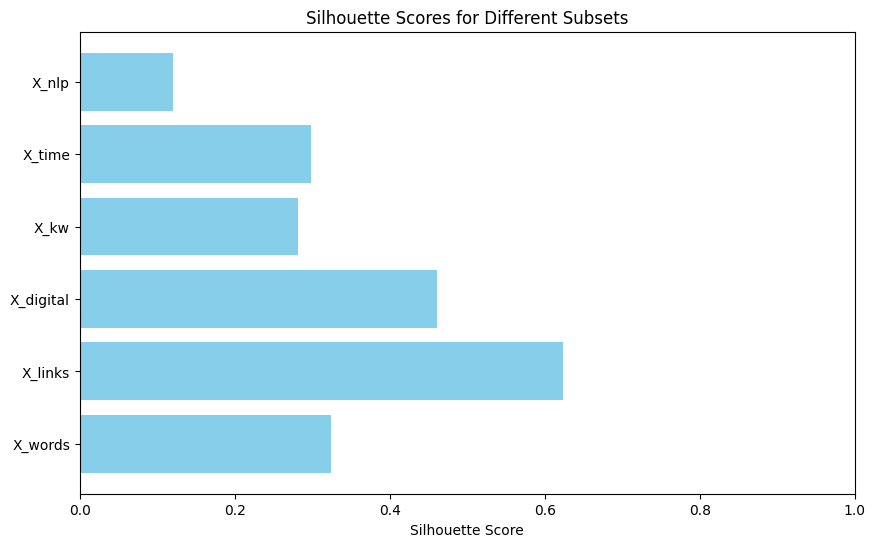

In [54]:
# Extract keys and values
labels = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(labels, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Different Subsets')
plt.xlim(0, 1)
plt.show()

Silhouette Score for X_words: 0.3242385065991312
Silhouette Score for X_links: 0.6234988163952856
Silhouette Score for X_digital: 0.4612849510405506
Silhouette Score for X_kw: 0.2817315516055183
Silhouette Score for X_time: 0.29805035491535053
Silhouette Score for X_nlp: 0.12049677894148407


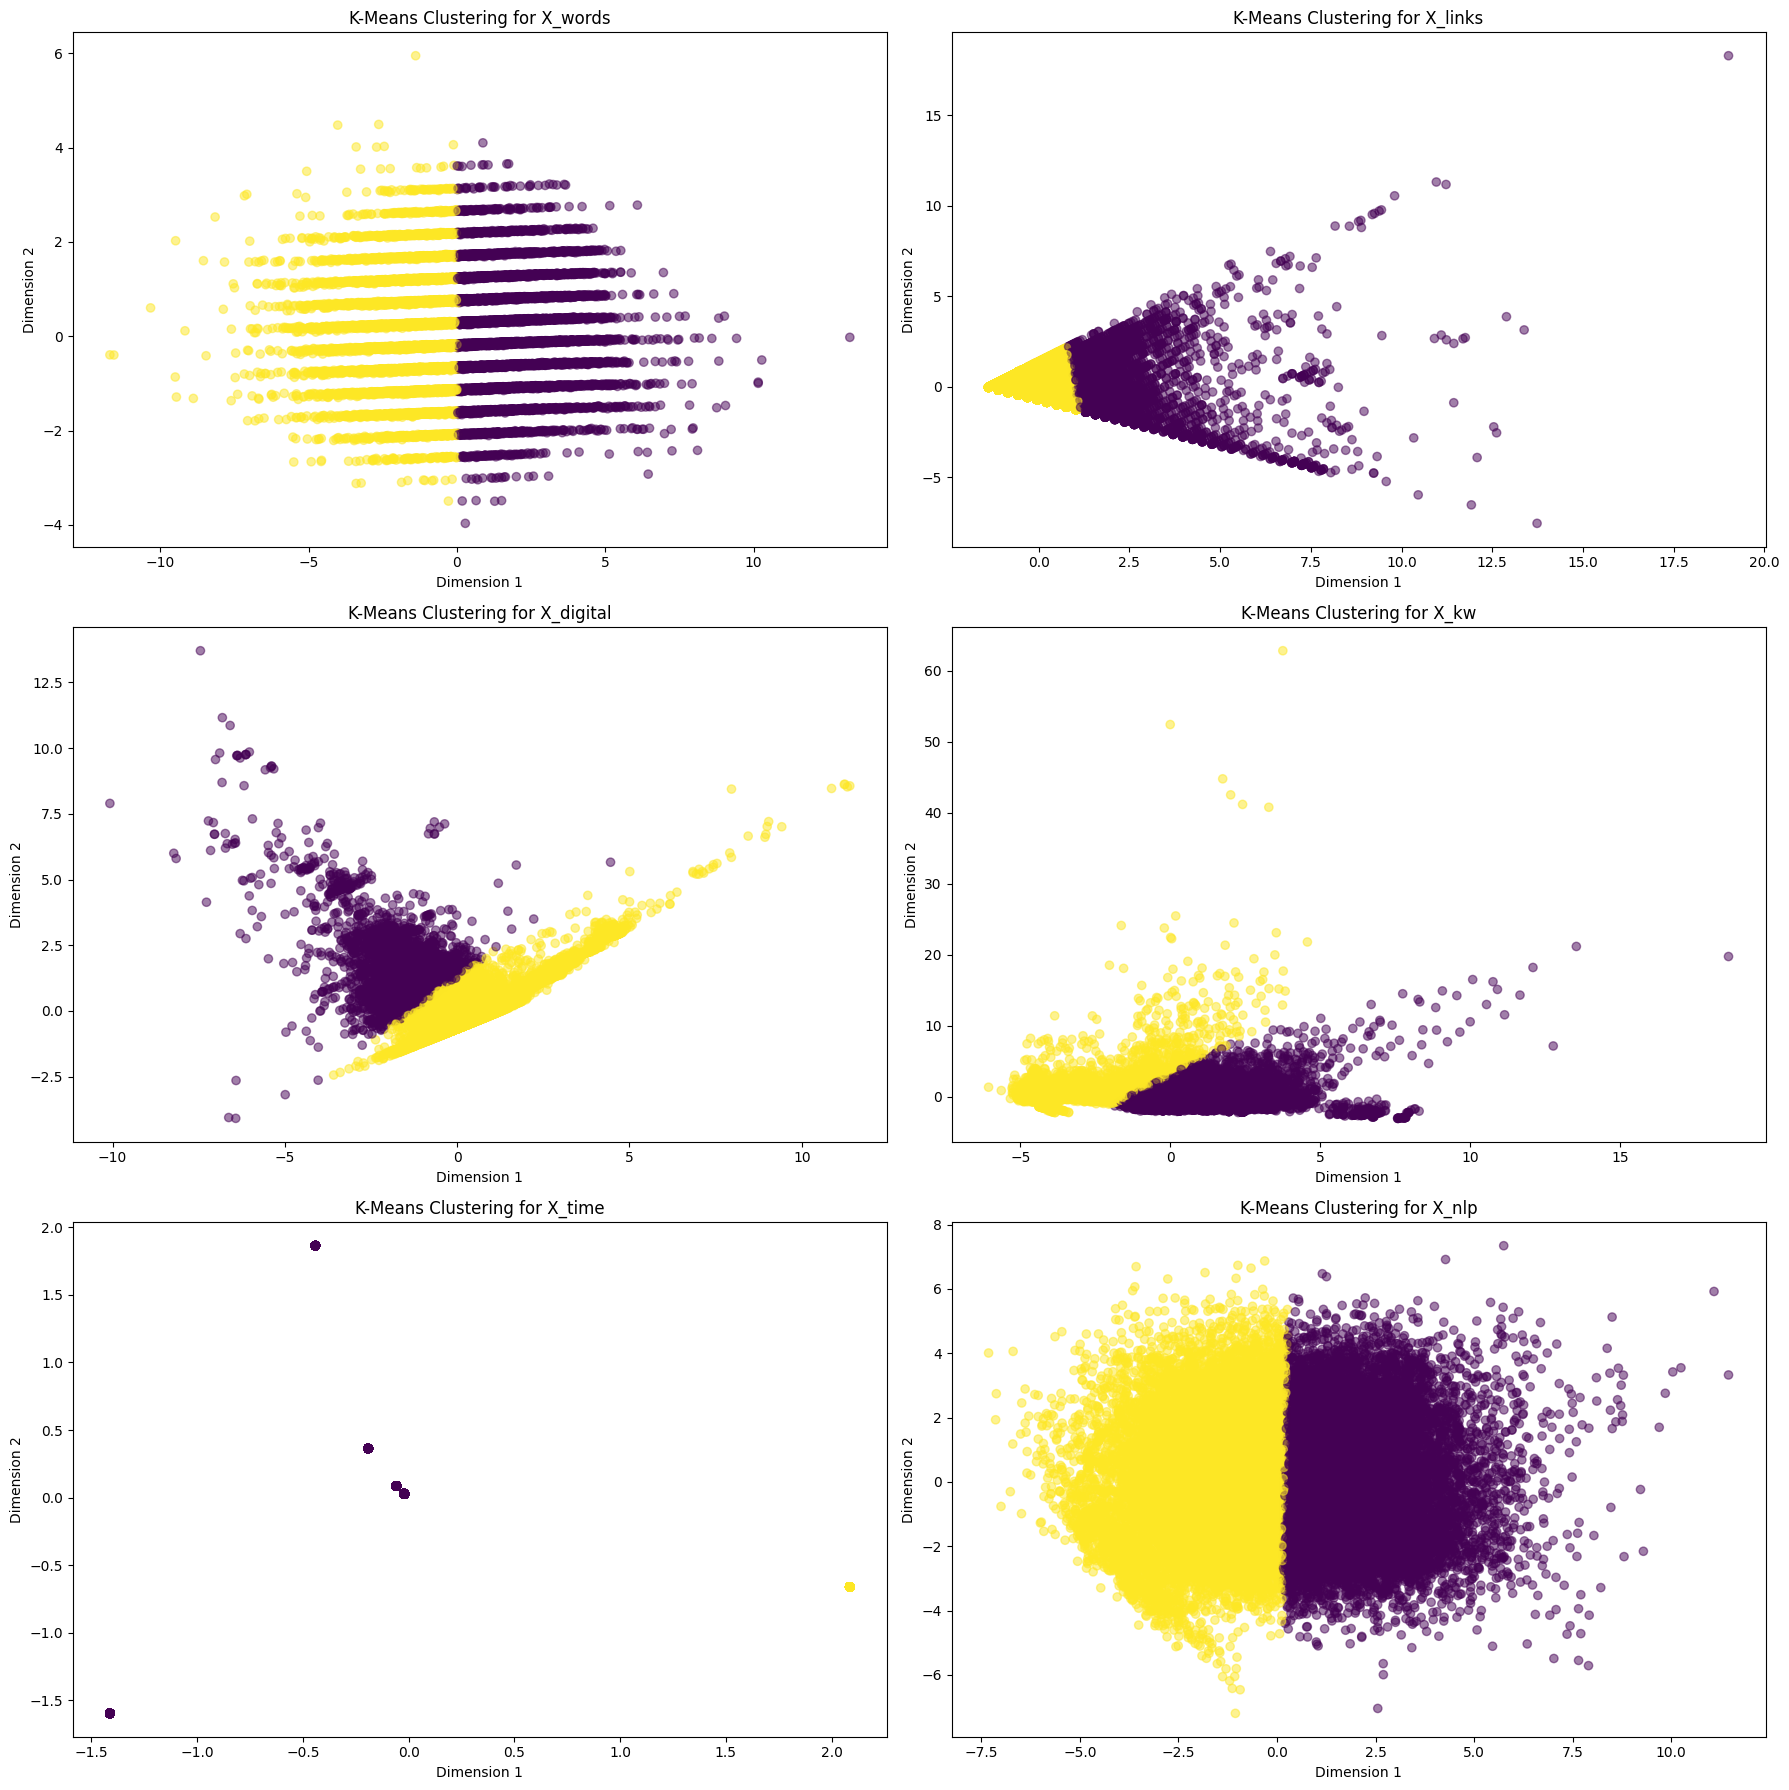

In [55]:
# Visualize the clustering results
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

axes[0, 0].scatter(X_words_pca[:, 0], X_words_pca[:, 1], c=X_words_kmeans_labels, cmap='viridis', alpha=0.5)
axes[0, 0].set_title('K-Means Clustering for X_words')

axes[0, 1].scatter(X_links_pca[:, 0], X_links_pca[:, 1], c=X_links_kmeans_labels, cmap='viridis', alpha=0.5)
axes[0, 1].set_title('K-Means Clustering for X_links')

axes[1, 0].scatter(X_digital_pca[:, 0], X_digital_pca[:, 1], c=X_digital_kmeans_labels, cmap='viridis', alpha=0.5)
axes[1, 0].set_title('K-Means Clustering for X_digital')

axes[1, 1].scatter(X_kw_pca[:, 0], X_kw_pca[:, 1], c=X_kw_kmeans_labels, cmap='viridis', alpha=0.5)
axes[1, 1].set_title('K-Means Clustering for X_kw')

axes[2, 0].scatter(X_time_pca[:, 0], X_time_pca[:, 1], c=X_time_kmeans_labels, cmap='viridis', alpha=0.5)
axes[2, 0].set_title('K-Means Clustering for X_time')

axes[2, 1].scatter(X_nlp_pca[:, 0], X_nlp_pca[:, 1], c=X_nlp_kmeans_labels, cmap='viridis', alpha=0.5)
axes[2, 1].set_title('K-Means Clustering for X_nlp')


for key, score in silhouette_scores.items():
    print(f'Silhouette Score for {key}: {score}')


    # Set x and y labels for each subplot
    for ax in axes.flat:
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
    
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import silhouette_samples

import matplotlib.cm as cm

# Function to plot silhouette scores
# def plot_silhouette(X, labels, title):
#     silhouette_avg = silhouette_score(X, labels)
#     sample_silhouette_values = silhouette_samples(X, labels)
    
#     fig, ax = plt.subplots(1, 1, figsize=(10, 6))
#     y_lower = 10
#     for i in range(len(np.unique(labels))):
#         ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
#         ith_cluster_silhouette_values.sort()
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i
#         color = cm.nipy_spectral(float(i) / len(np.unique(labels)))
#         ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
#         ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#         y_lower = y_upper + 10
    
#     ax.set_title(title)
#     ax.set_xlabel("Silhouette coefficient values")
#     ax.set_ylabel("Cluster label")
#     ax.axvline(x=silhouette_avg, color="red", linestyle="--")
#     ax.set_yticks([])
#     ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
#     plt.show()

# # Plot silhouette scores for each subset
# plot_silhouette(X_words, X_words_kmeans_labels, 'Silhouette plot for X_words')
# plot_silhouette(X_links, X_links_kmeans_labels, 'Silhouette plot for X_links')
# plot_silhouette(X_digital, X_digital_kmeans_labels, 'Silhouette plot for X_digital')
# plot_silhouette(X_kw, X_kw_kmeans_labels, 'Silhouette plot for X_kw')
# plot_silhouette(X_time, X_time_kmeans_labels, 'Silhouette plot for X_time')
# plot_silhouette(X_nlp, X_nlp_kmeans_labels, 'Silhouette plot for X_nlp')

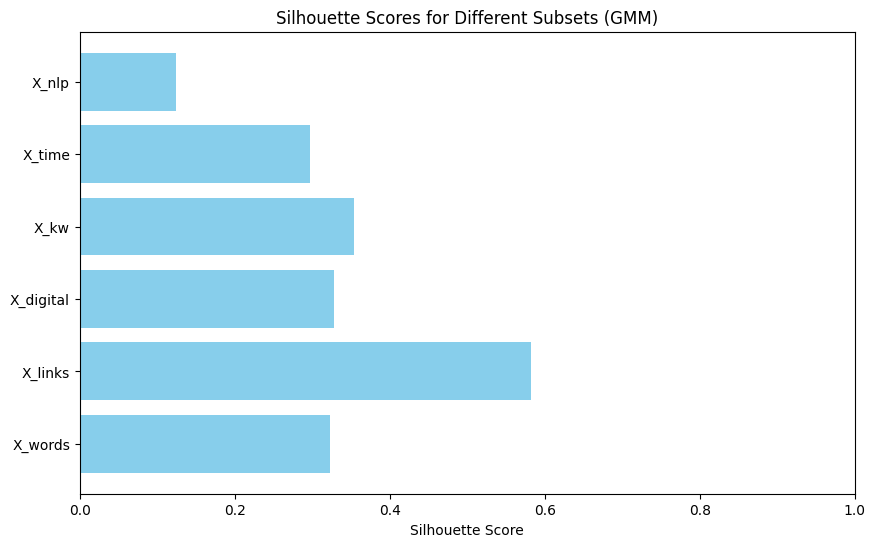

In [57]:
# Function to apply PCA and Gaussian Mixture Model clustering
def apply_pca_gmm(X, n_components=2, n_clusters=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_pca)
    
    return X_pca, gmm_labels

# Apply PCA and GMM clustering for each subset
X_words_pca_gmm, X_words_gmm_labels = apply_pca_gmm(X_words)
X_links_pca_gmm, X_links_gmm_labels = apply_pca_gmm(X_links)
X_digital_pca_gmm, X_digital_gmm_labels = apply_pca_gmm(X_digital)
X_kw_pca_gmm, X_kw_gmm_labels = apply_pca_gmm(X_kw)
X_time_pca_gmm, X_time_gmm_labels = apply_pca_gmm(X_time)
X_nlp_pca_gmm, X_nlp_gmm_labels = apply_pca_gmm(X_nlp)

# Calculate and print silhouette scores for GMM
silhouette_scores_gmm = {
    'X_words': silhouette_score(X_words, X_words_gmm_labels),
    'X_links': silhouette_score(X_links, X_links_gmm_labels),
    'X_digital': silhouette_score(X_digital, X_digital_gmm_labels),
    'X_kw': silhouette_score(X_kw, X_kw_gmm_labels),
    'X_time': silhouette_score(X_time, X_time_gmm_labels),
    'X_nlp': silhouette_score(X_nlp, X_nlp_gmm_labels)
}

# Plot Silhouette Scores for GMM
labels_gmm = list(silhouette_scores_gmm.keys())
scores_gmm = list(silhouette_scores_gmm.values())

plt.figure(figsize=(10, 6))
plt.barh(labels_gmm, scores_gmm, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Different Subsets (GMM)')
plt.xlim(0, 1)
plt.show()

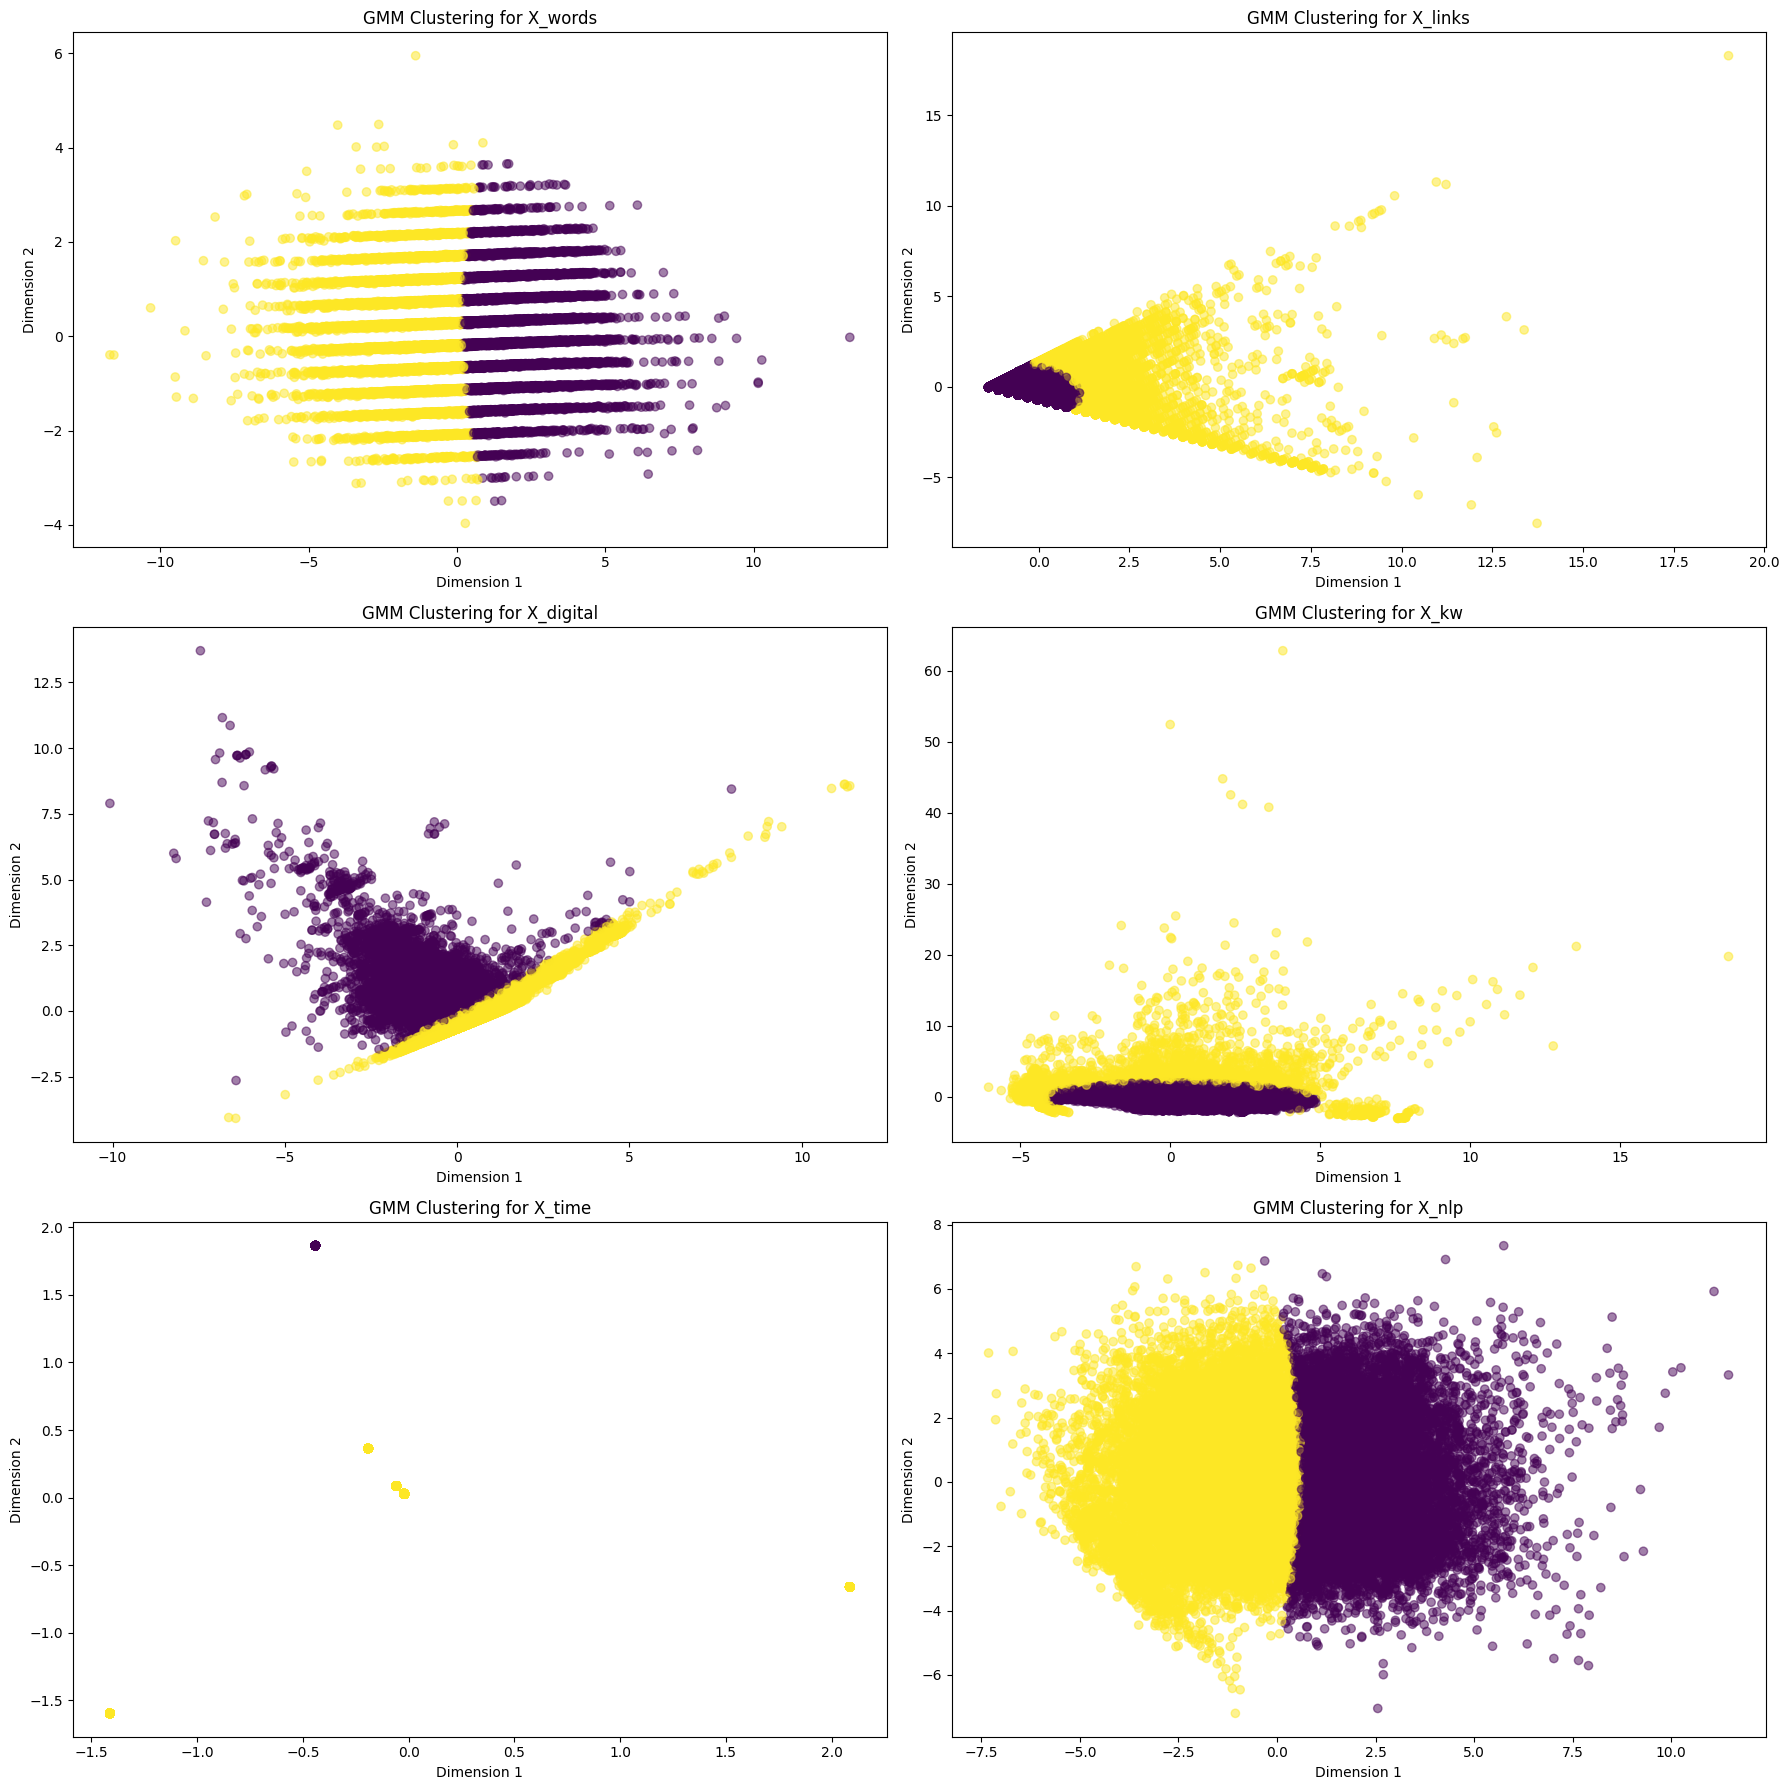

In [58]:
# Visualize the clustering results for GMM
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

axes[0, 0].scatter(X_words_pca_gmm[:, 0], X_words_pca_gmm[:, 1], c=X_words_gmm_labels, cmap='viridis', alpha=0.5)
axes[0, 0].set_title('GMM Clustering for X_words')

axes[0, 1].scatter(X_links_pca_gmm[:, 0], X_links_pca_gmm[:, 1], c=X_links_gmm_labels, cmap='viridis', alpha=0.5)
axes[0, 1].set_title('GMM Clustering for X_links')

axes[1, 0].scatter(X_digital_pca_gmm[:, 0], X_digital_pca_gmm[:, 1], c=X_digital_gmm_labels, cmap='viridis', alpha=0.5)
axes[1, 0].set_title('GMM Clustering for X_digital')

axes[1, 1].scatter(X_kw_pca_gmm[:, 0], X_kw_pca_gmm[:, 1], c=X_kw_gmm_labels, cmap='viridis', alpha=0.5)
axes[1, 1].set_title('GMM Clustering for X_kw')

axes[2, 0].scatter(X_time_pca_gmm[:, 0], X_time_pca_gmm[:, 1], c=X_time_gmm_labels, cmap='viridis', alpha=0.5)
axes[2, 0].set_title('GMM Clustering for X_time')

axes[2, 1].scatter(X_nlp_pca_gmm[:, 0], X_nlp_pca_gmm[:, 1], c=X_nlp_gmm_labels, cmap='viridis', alpha=0.5)
axes[2, 1].set_title('GMM Clustering for X_nlp')

for ax in axes.flat:
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

In [59]:
# Plot silhouette scores for each subset using GMM
# plot_silhouette(X_words, X_words_gmm_labels, 'Silhouette plot for X_words (GMM)')
# plot_silhouette(X_links, X_links_gmm_labels, 'Silhouette plot for X_links (GMM)')
# plot_silhouette(X_digital, X_digital_gmm_labels, 'Silhouette plot for X_digital (GMM)')
# plot_silhouette(X_kw, X_kw_gmm_labels, 'Silhouette plot for X_kw (GMM)')
# plot_silhouette(X_time, X_time_gmm_labels, 'Silhouette plot for X_time (GMM)')
# plot_silhouette(X_nlp, X_nlp_gmm_labels, 'Silhouette plot for X_nlp (GMM)')

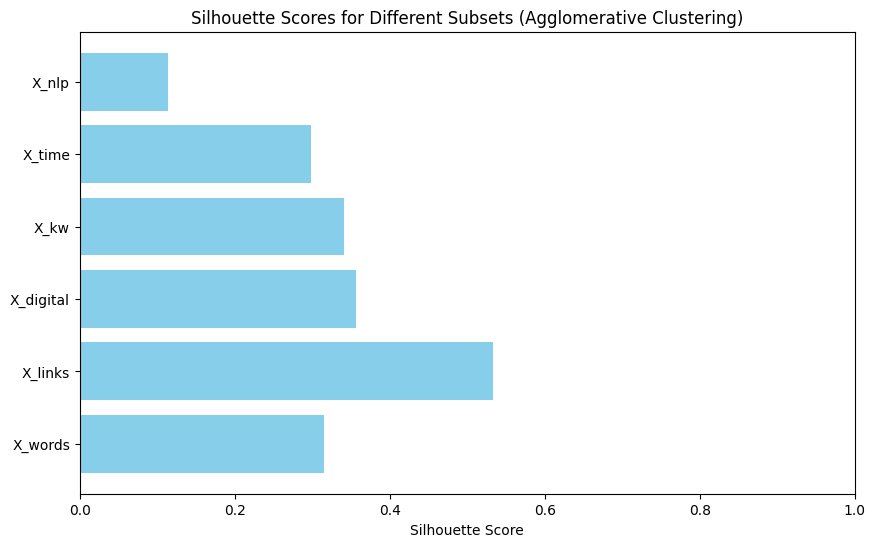

In [60]:
from sklearn.cluster import AgglomerativeClustering

# Function to apply PCA and Agglomerative Clustering
def apply_pca_agg(X, n_components=2, n_clusters=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_labels = agg_clustering.fit_predict(X_pca)
    
    return X_pca, agg_labels

# Apply PCA and Agglomerative Clustering for each subset
X_words_pca_agg, X_words_agg_labels = apply_pca_agg(X_words)
X_links_pca_agg, X_links_agg_labels = apply_pca_agg(X_links)
X_digital_pca_agg, X_digital_agg_labels = apply_pca_agg(X_digital)
X_kw_pca_agg, X_kw_agg_labels = apply_pca_agg(X_kw)
X_time_pca_agg, X_time_agg_labels = apply_pca_agg(X_time)
X_nlp_pca_agg, X_nlp_agg_labels = apply_pca_agg(X_nlp)

# Calculate and print silhouette scores for Agglomerative Clustering
silhouette_scores_agg = {
    'X_words': silhouette_score(X_words, X_words_agg_labels),
    'X_links': silhouette_score(X_links, X_links_agg_labels),
    'X_digital': silhouette_score(X_digital, X_digital_agg_labels),
    'X_kw': silhouette_score(X_kw, X_kw_agg_labels),
    'X_time': silhouette_score(X_time, X_time_agg_labels),
    'X_nlp': silhouette_score(X_nlp, X_nlp_agg_labels)
}

# Plot Silhouette Scores for Agglomerative Clustering
labels_agg = list(silhouette_scores_agg.keys())
scores_agg = list(silhouette_scores_agg.values())

plt.figure(figsize=(10, 6))
plt.barh(labels_agg, scores_agg, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Different Subsets (Agglomerative Clustering)')
plt.xlim(0, 1)
plt.show()

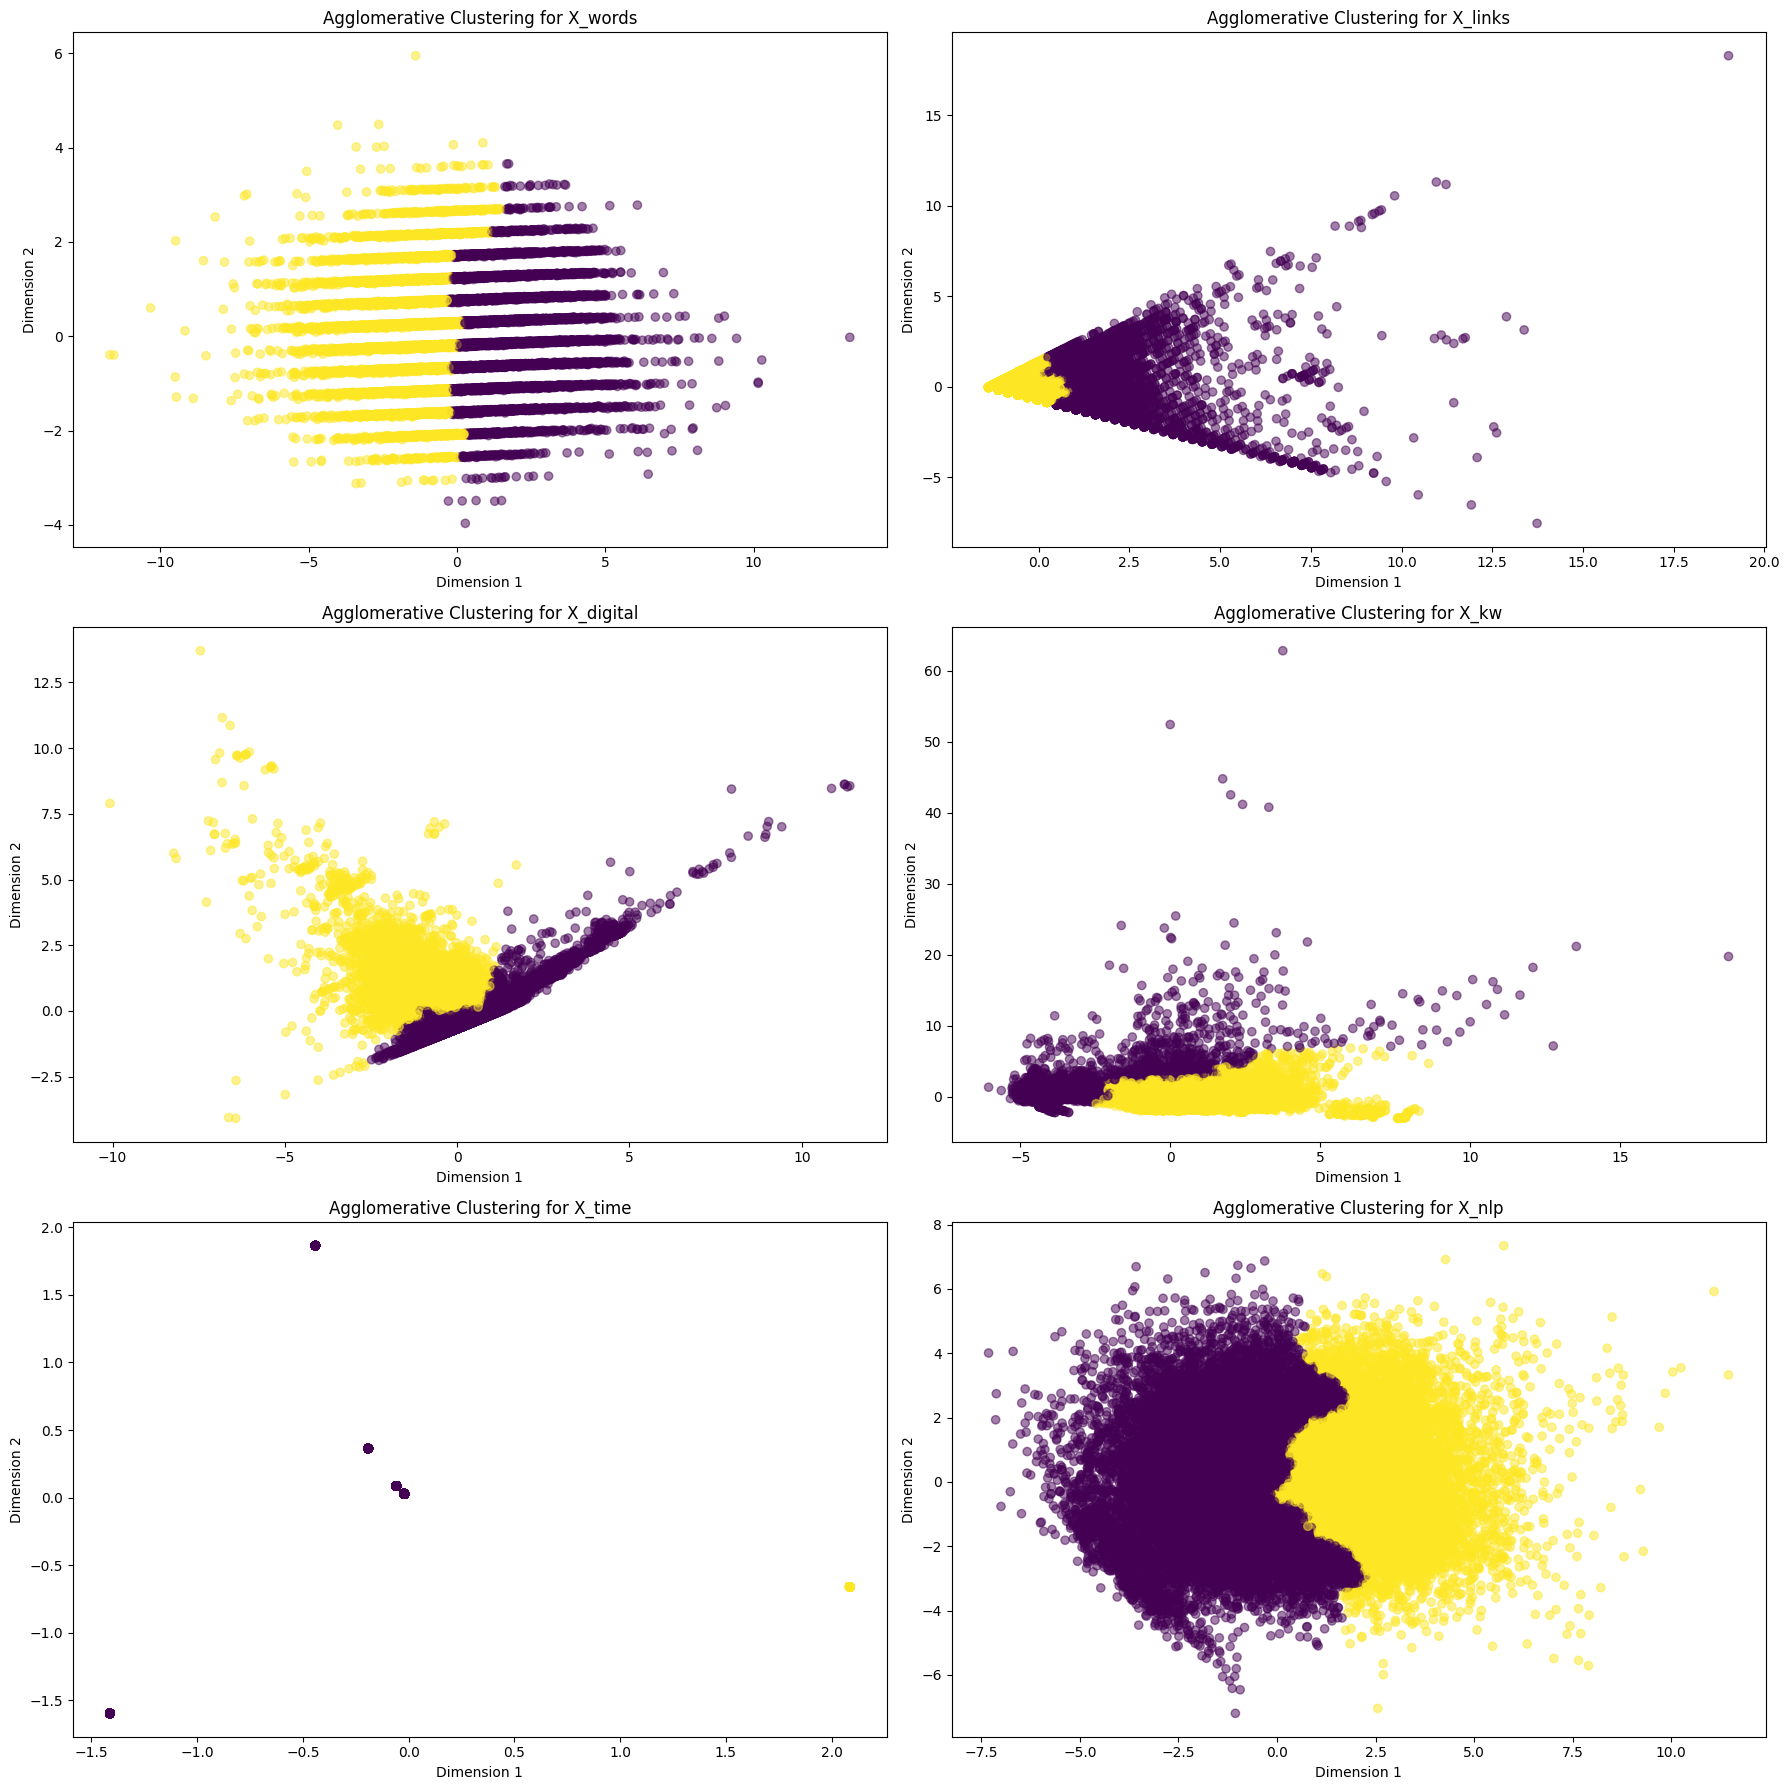

In [61]:
# Visualize the clustering results for Agglomerative Clustering
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

axes[0, 0].scatter(X_words_pca_agg[:, 0], X_words_pca_agg[:, 1], c=X_words_agg_labels, cmap='viridis', alpha=0.5)
axes[0, 0].set_title('Agglomerative Clustering for X_words')

axes[0, 1].scatter(X_links_pca_agg[:, 0], X_links_pca_agg[:, 1], c=X_links_agg_labels, cmap='viridis', alpha=0.5)
axes[0, 1].set_title('Agglomerative Clustering for X_links')

axes[1, 0].scatter(X_digital_pca_agg[:, 0], X_digital_pca_agg[:, 1], c=X_digital_agg_labels, cmap='viridis', alpha=0.5)
axes[1, 0].set_title('Agglomerative Clustering for X_digital')

axes[1, 1].scatter(X_kw_pca_agg[:, 0], X_kw_pca_agg[:, 1], c=X_kw_agg_labels, cmap='viridis', alpha=0.5)
axes[1, 1].set_title('Agglomerative Clustering for X_kw')

axes[2, 0].scatter(X_time_pca_agg[:, 0], X_time_pca_agg[:, 1], c=X_time_agg_labels, cmap='viridis', alpha=0.5)
axes[2, 0].set_title('Agglomerative Clustering for X_time')

axes[2, 1].scatter(X_nlp_pca_agg[:, 0], X_nlp_pca_agg[:, 1], c=X_nlp_agg_labels, cmap='viridis', alpha=0.5)
axes[2, 1].set_title('Agglomerative Clustering for X_nlp')

for ax in axes.flat:
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

plt.tight_layout()
plt.show()

In [62]:
X_words_kmeans_labels.shape


(37661,)

In [63]:
# Add clustering labels to X_scaled_df
X_scaled_df['X_words_kmeans_labels'] = X_words_kmeans_labels
X_scaled_df['X_words_gmm_labels'] = X_words_gmm_labels
X_scaled_df['X_words_agg_labels'] = X_words_agg_labels

# Repeat for other categories if needed
# Example for X_links
X_scaled_df['X_links_kmeans_labels'] = X_links_kmeans_labels
X_scaled_df['X_links_gmm_labels'] = X_links_gmm_labels
X_scaled_df['X_links_agg_labels'] = X_links_agg_labels

# Example for X_digital
X_scaled_df['X_digital_kmeans_labels'] = X_digital_kmeans_labels
X_scaled_df['X_digital_gmm_labels'] = X_digital_gmm_labels
X_scaled_df['X_digital_agg_labels'] = X_digital_agg_labels

# Example for X_kw
X_scaled_df['X_kw_kmeans_labels'] = X_kw_kmeans_labels
X_scaled_df['X_kw_gmm_labels'] = X_kw_gmm_labels
X_scaled_df['X_kw_agg_labels'] = X_kw_agg_labels

# Example for X_time
X_scaled_df['X_time_kmeans_labels'] = X_time_kmeans_labels
X_scaled_df['X_time_gmm_labels'] = X_time_gmm_labels
X_scaled_df['X_time_agg_labels'] = X_time_agg_labels

# Example for X_nlp
X_scaled_df['X_nlp_kmeans_labels'] = X_nlp_kmeans_labels
X_scaled_df['X_nlp_gmm_labels'] = X_nlp_gmm_labels
X_scaled_df['X_nlp_agg_labels'] = X_nlp_agg_labels

# Display the updated dataframe
X_scaled_df.head()


timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0   0.082334       -1.134887          0.532290        -0.651966   
1   0.304510        0.287148         -0.057844        -0.556016   
2  -1.387811        0.761159         -0.687615         0.944367   
3   0.796133        0.287148          0.133729        -0.229124   
4  -0.995457        0.761159         -0.407961         0.124598   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0          0.795484                 -0.747227   1.610233        1.909775   
1          0.489046                 -0.430782  -0.369677        0.190067   
2         -0.572559                  1.537090  -0.369677        0.190067   
3          0.664915                 -0.177980   0.350290       -0.669787   
4          0.114393                  0.344426  -0.189685        0.476685   

   num_imgs  num_videos  ...  X_digital_agg_labels  X_kw_kmeans_labels  \
0 -0.431695   -0.311869  ...                     0                   0   
1  0.065461   -0.055239  ...                     0                   1   
2 -0.431695   -0.311869  ...                     0                   0   
3 -0.555984   -0.311869  ...                     0                   0   
4 -0.431695   -0.311869  ...                     0                   0   

   X_kw_gmm_labels  X_kw_agg_labels  X_time_kmeans_labels  X_time_gmm_labels  \
0                0                1                     0                  1   
1                1                1                     0                  1   
2                0                1                     1                  1   
3                0                1                     1                  1   
4                0                1                     0                  0   

   X_time_agg_labels  X_nlp_kmeans_labels  X_nlp_gmm_labels  X_nlp_agg_labels  
0                  0                    0                 0                 1  
1                  0                    0                 0                 0  
2                  1                    0                 0                 0  
3                  1                    1                 1                 0  
4                  0                    1                 1                 0  

[5 rows x 77 columns]

In [64]:
# Define weights for each category based on silhouette scores
weights = {
    'X_words_kmeans_labels': 0.3244580746402815,
    'X_links_kmeans_labels': 0.6416189659930488,
    'X_digital_kmeans_labels': 0.4552221737896696,
    'X_kw_kmeans_labels': 0.2788169771307352,
    'X_time_kmeans_labels': 0.2977724928984419,
    'X_nlp_kmeans_labels': 0.12141335364425009
}

# Define weights for GMM based on silhouette scores
weights_gmm = {
    'X_words_gmm_labels': 0.323128890208765,
    'X_links_gmm_labels': 0.5829184975496621,
    'X_digital_gmm_labels': 0.328203598715096,
    'X_kw_gmm_labels': 0.353274257321538,
    'X_time_gmm_labels': 0.29707759640105863,
    'X_nlp_gmm_labels': 0.12486006418588456
}

# Define weights for Agglomerative Clustering based on silhouette scores
weights_agg = {
    'X_words_agg_labels': 0.31514373786277594,
    'X_links_agg_labels': 0.5337661978461057,
    'X_digital_agg_labels': 0.3559840000427151,
    'X_kw_agg_labels': 0.3534781120967743,
    'X_time_agg_labels': 0.29805035491535053,
    'X_nlp_agg_labels': 0.09989584544033868
}

# Multiply each cluster label by its weight
weighted_labels_kmeans = (X_scaled_df['X_words_kmeans_labels'] * weights['X_words_kmeans_labels'] +
                   X_scaled_df['X_links_kmeans_labels'] * weights['X_links_kmeans_labels'] +
                   X_scaled_df['X_digital_kmeans_labels'] * weights['X_digital_kmeans_labels'] +
                   X_scaled_df['X_kw_kmeans_labels'] * weights['X_kw_kmeans_labels'] +
                   X_scaled_df['X_time_kmeans_labels'] * weights['X_time_kmeans_labels'] +
                   X_scaled_df['X_nlp_kmeans_labels'] * weights['X_nlp_kmeans_labels'])

# Round to the nearest integer to assign the overall cluster label
X_scaled_df['overall_kmeans_labels'] = weighted_labels_kmeans.round().astype(int)

# Multiply each GMM cluster label by its weight
weighted_labels_gmm = (X_scaled_df['X_words_gmm_labels'] * weights_gmm['X_words_gmm_labels'] +
                       X_scaled_df['X_links_gmm_labels'] * weights_gmm['X_links_gmm_labels'] +
                       X_scaled_df['X_digital_gmm_labels'] * weights_gmm['X_digital_gmm_labels'] +
                       X_scaled_df['X_kw_gmm_labels'] * weights_gmm['X_kw_gmm_labels'] +
                       X_scaled_df['X_time_gmm_labels'] * weights_gmm['X_time_gmm_labels'] +
                       X_scaled_df['X_nlp_gmm_labels'] * weights_gmm['X_nlp_gmm_labels'])

# Round to the nearest integer to assign the overall GMM cluster label
X_scaled_df['overall_gmm_labels'] = weighted_labels_gmm.round().astype(int)

# Multiply each Agglomerative Clustering cluster label by its weight
weighted_labels_agg = (X_scaled_df['X_words_agg_labels'] * weights_agg['X_words_agg_labels'] +
                       X_scaled_df['X_links_agg_labels'] * weights_agg['X_links_agg_labels'] +
                       X_scaled_df['X_digital_agg_labels'] * weights_agg['X_digital_agg_labels'] +
                       X_scaled_df['X_kw_agg_labels'] * weights_agg['X_kw_agg_labels'] +
                       X_scaled_df['X_time_agg_labels'] * weights_agg['X_time_agg_labels'] +
                       X_scaled_df['X_nlp_agg_labels'] * weights_agg['X_nlp_agg_labels'])

# Round to the nearest integer to assign the overall Agglomerative Clustering cluster label
X_scaled_df['overall_agg_labels'] = weighted_labels_agg.round().astype(int)

# Display the updated dataframe
X_scaled_df.head()


timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0   0.082334       -1.134887          0.532290        -0.651966   
1   0.304510        0.287148         -0.057844        -0.556016   
2  -1.387811        0.761159         -0.687615         0.944367   
3   0.796133        0.287148          0.133729        -0.229124   
4  -0.995457        0.761159         -0.407961         0.124598   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0          0.795484                 -0.747227   1.610233        1.909775   
1          0.489046                 -0.430782  -0.369677        0.190067   
2         -0.572559                  1.537090  -0.369677        0.190067   
3          0.664915                 -0.177980   0.350290       -0.669787   
4          0.114393                  0.344426  -0.189685        0.476685   

   num_imgs  num_videos  ...  X_kw_agg_labels  X_time_kmeans_labels  \
0 -0.431695   -0.311869  ...                1                     0   
1  0.065461   -0.055239  ...                1                     0   
2 -0.431695   -0.311869  ...                1                     1   
3 -0.555984   -0.311869  ...                1                     1   
4 -0.431695   -0.311869  ...                1                     0   

   X_time_gmm_labels  X_time_agg_labels  X_nlp_kmeans_labels  \
0                  1                  0                    0   
1                  1                  0                    0   
2                  1                  1                    0   
3                  1                  1                    1   
4                  0                  0                    1   

   X_nlp_gmm_labels  X_nlp_agg_labels  overall_kmeans_labels  \
0                 0                 1                      1   
1                 0                 0                      2   
2                 0                 0                      1   
3                 1                 0                      2   
4                 1                 0                      1   

   overall_gmm_labels  overall_agg_labels  
0                   2                   1  
1                   1                   1  
2                   1                   1  
3                   1                   2  
4                   0                   1  

[5 rows x 80 columns]

In [65]:
# Remove individual cluster labels
X_scaled_df.drop(columns=[
    'X_words_kmeans_labels', 'X_words_gmm_labels', 'X_words_agg_labels',
    'X_links_kmeans_labels', 'X_links_gmm_labels', 'X_links_agg_labels',
    'X_digital_kmeans_labels', 'X_digital_gmm_labels', 'X_digital_agg_labels',
    'X_kw_kmeans_labels', 'X_kw_gmm_labels', 'X_kw_agg_labels',
    'X_time_kmeans_labels', 'X_time_gmm_labels', 'X_time_agg_labels',
    'X_nlp_kmeans_labels', 'X_nlp_gmm_labels', 'X_nlp_agg_labels'
], inplace=True)



## Ensemble Learning

In [68]:
from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Define a custom ensemble classifier
class WeightedMajorityVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, weights):
        self.classifiers = classifiers
        self.weights = weights

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.asarray([clf.predict(X) for clf in self.classifiers])
        weighted_votes = np.average(predictions, axis=0, weights=self.weights)
        return np.round(weighted_votes).astype(int)

# Define new classifiers
classifiers = [
    ('lr', best_lr),
    ('xgb', best_xgb),
    ('nb', best_nb),
    ('svm', svm)
]

# Define new weights
weights = [0.8, 1.0, 0.6, 0.9]  # Adjust these weights based on performance

# Create the new ensemble classifier
ensemble_clf = WeightedMajorityVotingClassifier(
    classifiers=[clf for name, clf in classifiers],
    weights=weights
)

# Fit the new ensemble classifier
ensemble_clf.fit(X_train_scaled, y_train)

# Predict using the new ensemble classifier
y_pred_ensemble = ensemble_clf.predict(X_test_scaled)

# Evaluate the new ensemble classifier
print("Ensemble Classifier Performance:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Classifier Performance:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3604
           1       0.67      0.70      0.69      3929

    accuracy                           0.66      7533
   macro avg       0.66      0.66      0.66      7533
weighted avg       0.66      0.66      0.66      7533

